### Nyquistkriteriet

Betrakta det instabila systemet

$$
    G(s) = \frac{1}{s-1},
$$
som skall regleras med en PI-regulator

$$
    F(s)=K_p+\frac{K_i}{s},
$$
med parametervärdena
$$
    K_p = 0.5 \quad K_i = 1
$$
Detta betyder att kretsöverföringen ges av 
$$
    L(s) = \frac{K_p s+K_i}{s(s-1)}
$$
Är systemet stabilt?

För att utreda detta, så påminner vi om  att Nyquistkriteriet ger antalet instabila poler $Z$ för det slutna systemet som
$$
  Z = P+N,
$$
där
* $P=$ antalet instabila poler hos $L(s)$ 
* $N=$ antal varv medurs runt punkten -1 för $L(\gamma)$,

och $\gamma$ definieras av *Nyquists kontur*, bestående av fyra segment:
\begin{align*}
    I:\quad &s=i\omega, \quad\omega=r\to\infty       &(r\to 0) \\
    II:\quad &s=Re^{i\theta}, \quad\theta=\pi/2 \to -\pi/2    &(R\to\infty) \\
    III:\quad &s=i\omega, \quad\omega=-\infty\to -r  &(r\to 0) \\
    IV:\quad &s=re^{i\theta}, \quad\theta=-\pi/2 \to \pi/2 &(r\to 0)
\end{align*}

Följande sammanfattar hur $L(\gamma)$ ser ut:

\begin{align*}
    I:\quad &L(i\omega) \text{ går från }\frac{K_i}{r}i \text{ till } 0 \\
    II:\quad &L(Re^{i\theta})\to 0, R\to\infty \\
    III:\quad &\text{Kurvan blir spegelbilden av den i segment }I \\
    IV:\quad &L(re^{i\theta})\approx -\frac{K_i}{re^{i\theta}}=-\frac{K_i}{r}e^{-i\theta}, \text{ som går \textit{medurs} från }-\frac{K_i}{r}i \text{ till } \frac{K_i}{r}i
\end{align*}


1


c:\ProgramData\Anaconda3\lib\site-packages\control\freqplot.py:943: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(


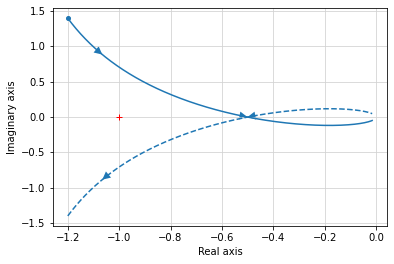

In [56]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt

s = ct.tf('s')
G = 1/(s-1)
Kp = 0.5
Ki = 1
F = Kp + Ki/s
L = F*G

count = ct.nyquist_plot(L, omega_limits=[0.5,10])
print(count)


1


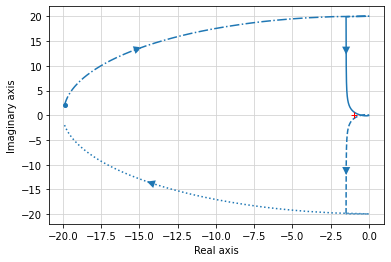

In [59]:

count2 = ct.nyquist_plot(L, omega_limits=[0.00001,10])
print(count2)

För att se lite mer detaljer så har vi anget två olika frekvensintervaller och gjort två plottar som visar olika delar av Nykvistdiagrammet. Vi får här hjälp med att hålla redan på antalet varv ($N=\text{count}=1$). Kolla själv att detta stämmer och notera speciellt att bilden av segment IV är en stor halvcirkel, som löper medurs och "omfamnar" hela vänstra halvplanet. Eftersom det öppna systemet har en instabil pol (origo oräknat), så får vi alltså 
$$
    Z = P+N = 1+1 = 2,
$$
vilket innebär att det slutna systemet har två instabila poler. 

Kommentar: I detta fallet är det ju enkelt att kontrollera slutna systemets karakteristiska ekvation, som ges av
$$
    s(s-1)+K_ps+K_i = s(s-1)+0.5s+1 = s^2-0.5s+1 = 0.
$$
Vi kan konstatera att det slutna systemet som väntat har ett instabilt komplexkonjugerat polpar.

Från Nyquistdiagramet kan vi också se att om förstärkningen i kretsen ökas med en faktor större än 2 så cirklas -1 in  i motsat riktning och
$$
    Z = P+N = 1-1 = 0,
$$

Vi konfirmerar detta med att öka parametervärdena med en faktor 3,
$$
    K_p = 1.5 \quad K_i = 3
$$
Då blir Nyquistdiagramet

-1


c:\ProgramData\Anaconda3\lib\site-packages\control\freqplot.py:943: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(


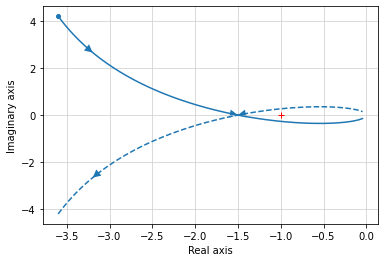

In [52]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt

s = ct.tf('s')
G = 1/(s-1)
Kp = 1.5
Ki = 3
F = Kp + Ki/s
L = F*G

count = ct.nyquist_plot(L, omega_limits=[0.5,10])
print(count)

och slutna systemets karakteristiska ekvation, 
$$
    s(s-1)+K_ps+K_i = s(s-1)+1.5s+3 = s^2+0.5s+3 = 0 
$$
som har komplexkonjugerade rötter med negativ realdel.

Kommentar 2: Här fokuserade vi bara på att undersöka stabiliteten mha Nyquistdiagramet och valde att öka förstärkningen med en faktor 3. Man ser dock se att Nyquistkurvan passerar ganska nära -1 vilket typiskt betyder att slutna systemet är "svängigt", har stora imaginärdelar på de komplexa polerna. Detta är till stor del en följd av att vi har ett högt värde på $K_i$. Du kan prova att minsta $K_i$ och se hur det påverkar Nyquistkurvan och polernas läge.